<a href="https://colab.research.google.com/github/septianidn/APM_11/blob/main/Pertemuan%203/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [9]:
#membaca data
import io
import pandas as pd
df = pd.read_csv('gdrive/My Drive/APM/P3/apples_and_oranges.csv')

dict_Class = {
    'orange' : 2,
    'apple' : 1
}
df['Class'] = df['Class'].apply(lambda x : dict_Class[x])

feature_cols = ['Weight', 'Size']
X = df[feature_cols].values
y = df['Class'].values

df.head()

,Weight,Size,Class
0,69,4.39,2
1,69,4.21,2
2,65,4.09,2
3,72,5.85,1
4,67,4.70,2


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred  =  classifier.predict(X_test)
y_pred

array([2, 2, 1, 2, 1, 2, 1, 1])

In [15]:
y_test

array([2, 2, 1, 2, 1, 2, 1, 1])

In [17]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[4, 0],
       [0, 4]])

In [18]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 4
FP: 0
FN: 0
TP: 4


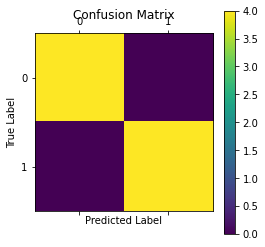

In [19]:
plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [20]:
accuracy_score(y_test, y_pred)

1.0

In [23]:
precision_score(y_test, y_pred)

1.0

In [26]:
f1_score(y_test, y_pred)

1.0